# Introduction to Cartopy

Projection and Transform keywords:

    ~ Projection argument determines what the plot looks like.
    ~ The transform argument tells Cartopy what coordinate system your data are defined in.

# Documentation

In [1]:
from IPython.display import IFrame
documentation = IFrame(src='https://scitools.org.uk/cartopy/docs/latest/#', width=1000, height=500)
display(documentation)

# Imports

In [4]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
from vega_datasets import data as vds

# Basic Map

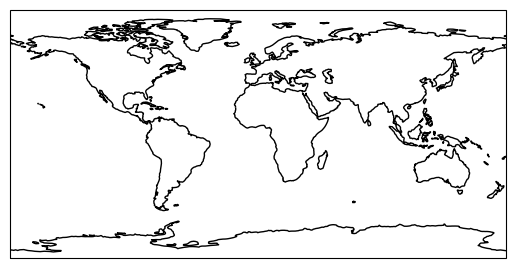

In [5]:
# Example 1
m1 = plt.axes(projection=ccrs.PlateCarree())
m1.coastlines()

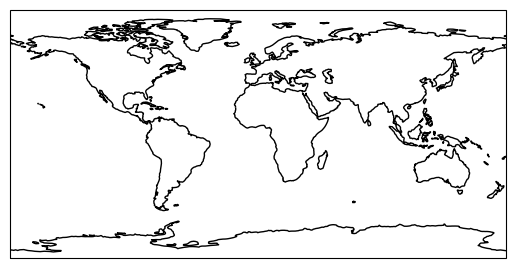

In [7]:
# Example 2
fig = plt.figure()
m2 = fig.add_subplot(projection=ccrs.PlateCarree())
m2.coastlines()

# Change Size

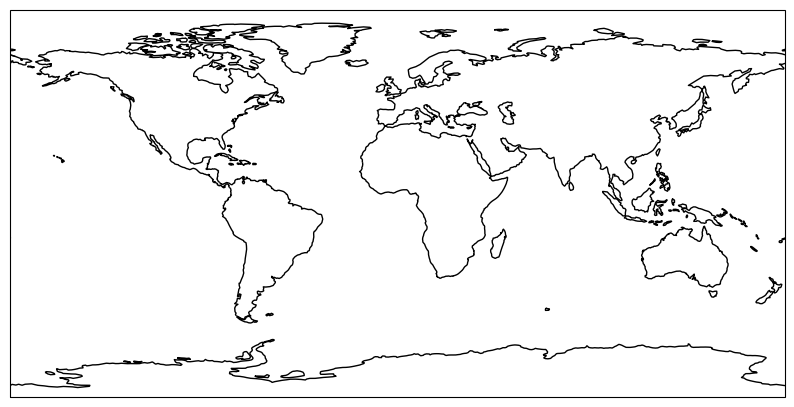

In [9]:
fig = plt.figure(figsize=(10,10))
m3 = fig.add_subplot(projection=ccrs.PlateCarree())
m3.coastlines()

# Add Features

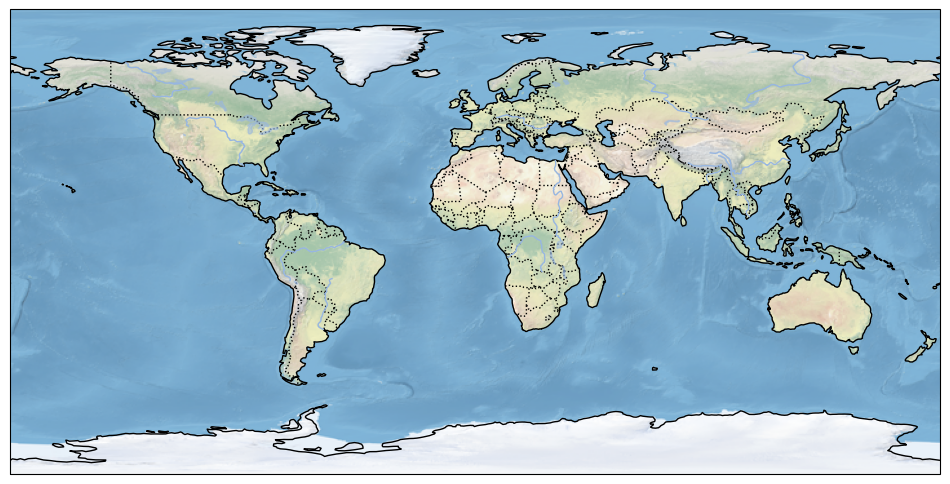

In [16]:
# import cartopy.feature as cfeature

plt.figure(figsize=(12,12))
m4 = plt.axes(projection=ccrs.PlateCarree())

m4.add_feature(cfeature.LAND)
m4.add_feature(cfeature.OCEAN)
m4.add_feature(cfeature.COASTLINE)
m4.add_feature(cfeature.BORDERS, linestyle=':')
m4.add_feature(cfeature.LAKES, alpha=0.5)
m4.add_feature(cfeature.RIVERS)

m4.stock_img()  # you can use the code without this line also

plt.savefig('C:\\Users\\apurv\\Desktop\\Spyder\\files\\map.png')

# Save Map

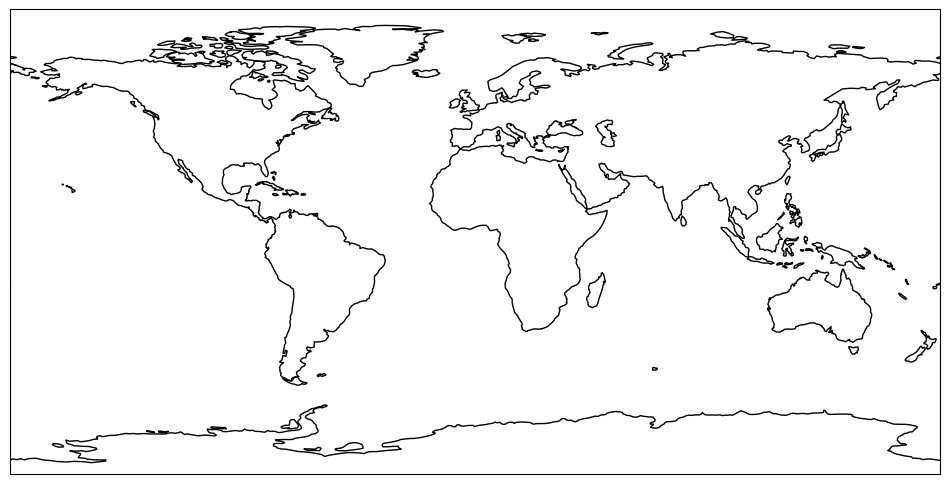

In [15]:
plt.figure(figsize=(12,12))
m5 = plt.axes(projection=ccrs.PlateCarree())
m5.coastlines()

# save plot by calling plt.savefig() before plt.show()
plt.savefig('C:\\Users\\apurv\\Desktop\\Spyder\\files\\coastlines.pdf')
plt.savefig('C:\\Users\\apurv\\Desktop\\Spyder\\files\\coastlines.png')

# Plot Locations with Labels

In [18]:
airports = vds.airports()
airports = airports.iloc[:10]
airports.head()

iata                  name              city state country   latitude  \
0  00M               Thigpen       Bay Springs    MS     USA  31.953765   
1  00R  Livingston Municipal        Livingston    TX     USA  30.685861   
2  00V           Meadow Lake  Colorado Springs    CO     USA  38.945749   
3  01G          Perry-Warsaw             Perry    NY     USA  42.741347   
4  01J      Hilliard Airpark          Hilliard    FL     USA  30.688012   

    longitude  
0  -89.234505  
1  -95.017928  
2 -104.569893  
3  -78.052081  
4  -81.905944

C:\Users\apurv\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


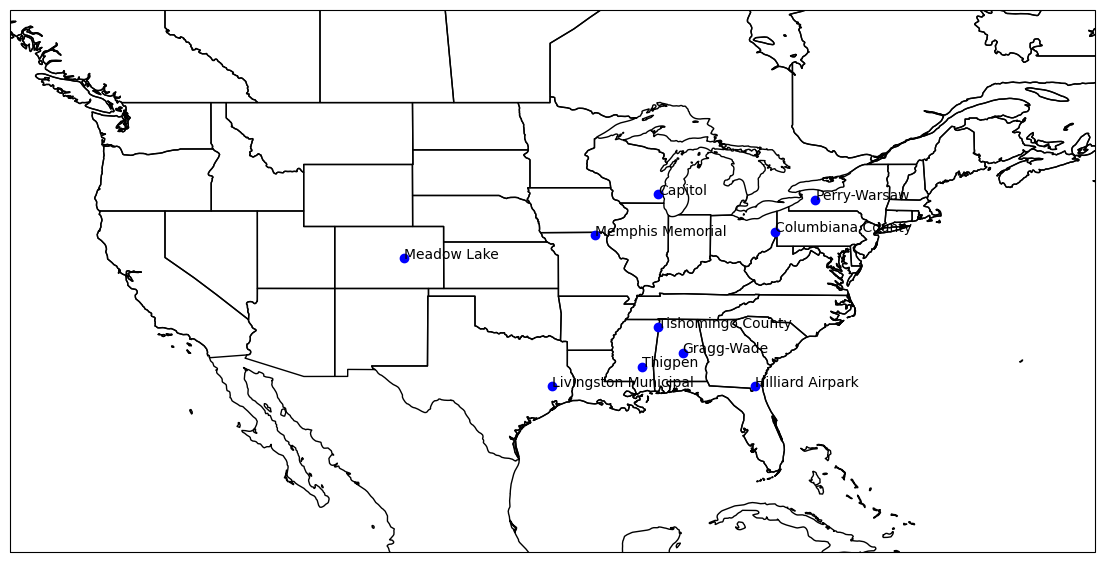

In [20]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m6.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())
m6.add_feature(cfeature.STATES)
m6.coastlines()

for i in airports.itertuples():
    m6.scatter(i.longitude, i.latitude, color='blue', transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, i.name)

# Plot Locations with Size Bubbles

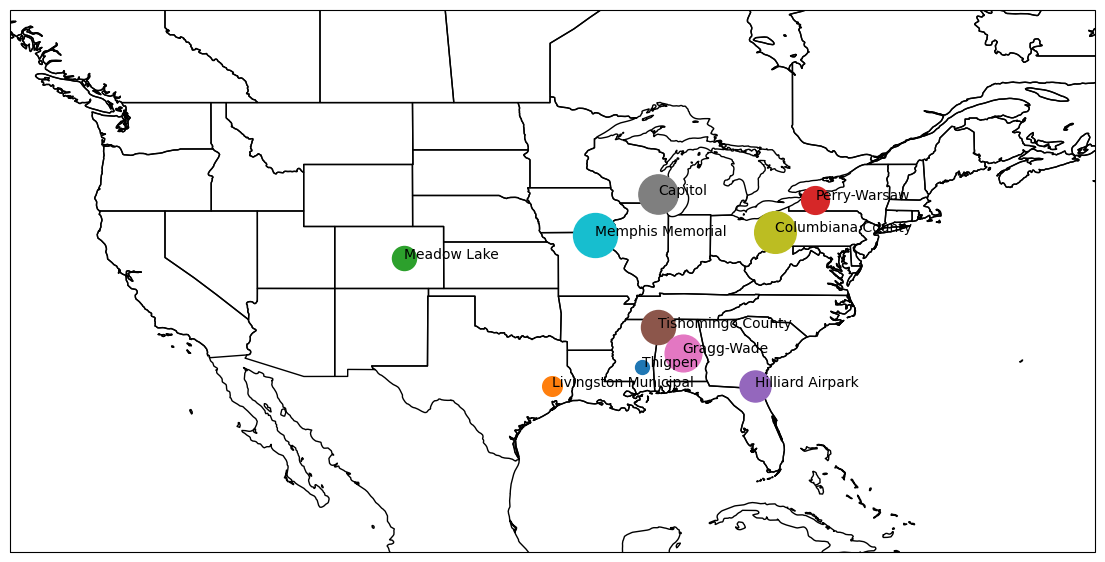

In [24]:
# add marker size column to airports dataframe
airports['marker_size'] = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

fig = plt.figure(figsize=(14,14))
m7 = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m7.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())
m7.add_feature(cfeature.STATES)
m7.coastlines()

for i in airports.itertuples():
    m7.scatter(i.longitude, i.latitude, s=i.marker_size, transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, i.name)

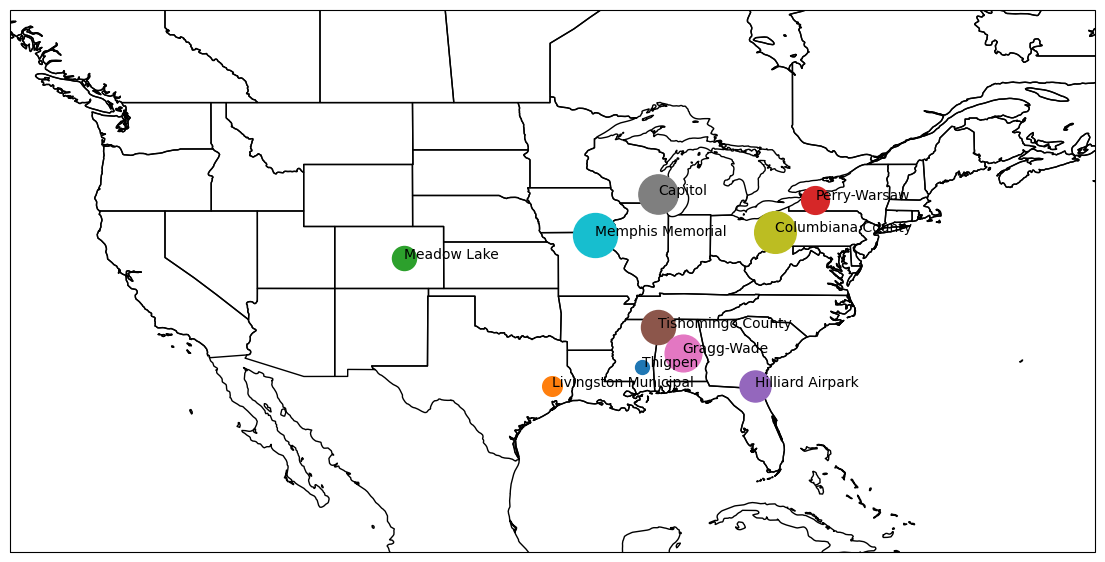

In [27]:
# using apply instead of a loop
fig = plt.figure(figsize=(14,14))
m = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())
m.add_feature(cfeature.STATES)
m.coastlines()

airports.apply(lambda x: m.scatter(x['longitude'],
                                x['latitude'],
                                s=x['marker_size'],
                                transform=ccrs.PlateCarree()), axis=1);

airports.apply(lambda x: plt.text(x['longitude'], x['latitude'], x['name']), axis=1);

# Projections with Subplots

C:\Users\apurv\AppData\Local\Temp\ipykernel_11388\2355130669.py:9: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(),
C:\Users\apurv\AppData\Local\Temp\ipykernel_11388\2355130669.py:11: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(),
C:\Users\apurv\AppData\Local\Temp\ipykernel_11388\2355130669.py:17: UserWarning: The default value for the *approx* keyword argument to OSNI will change from True to False after 0.18.
  'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(),
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of 

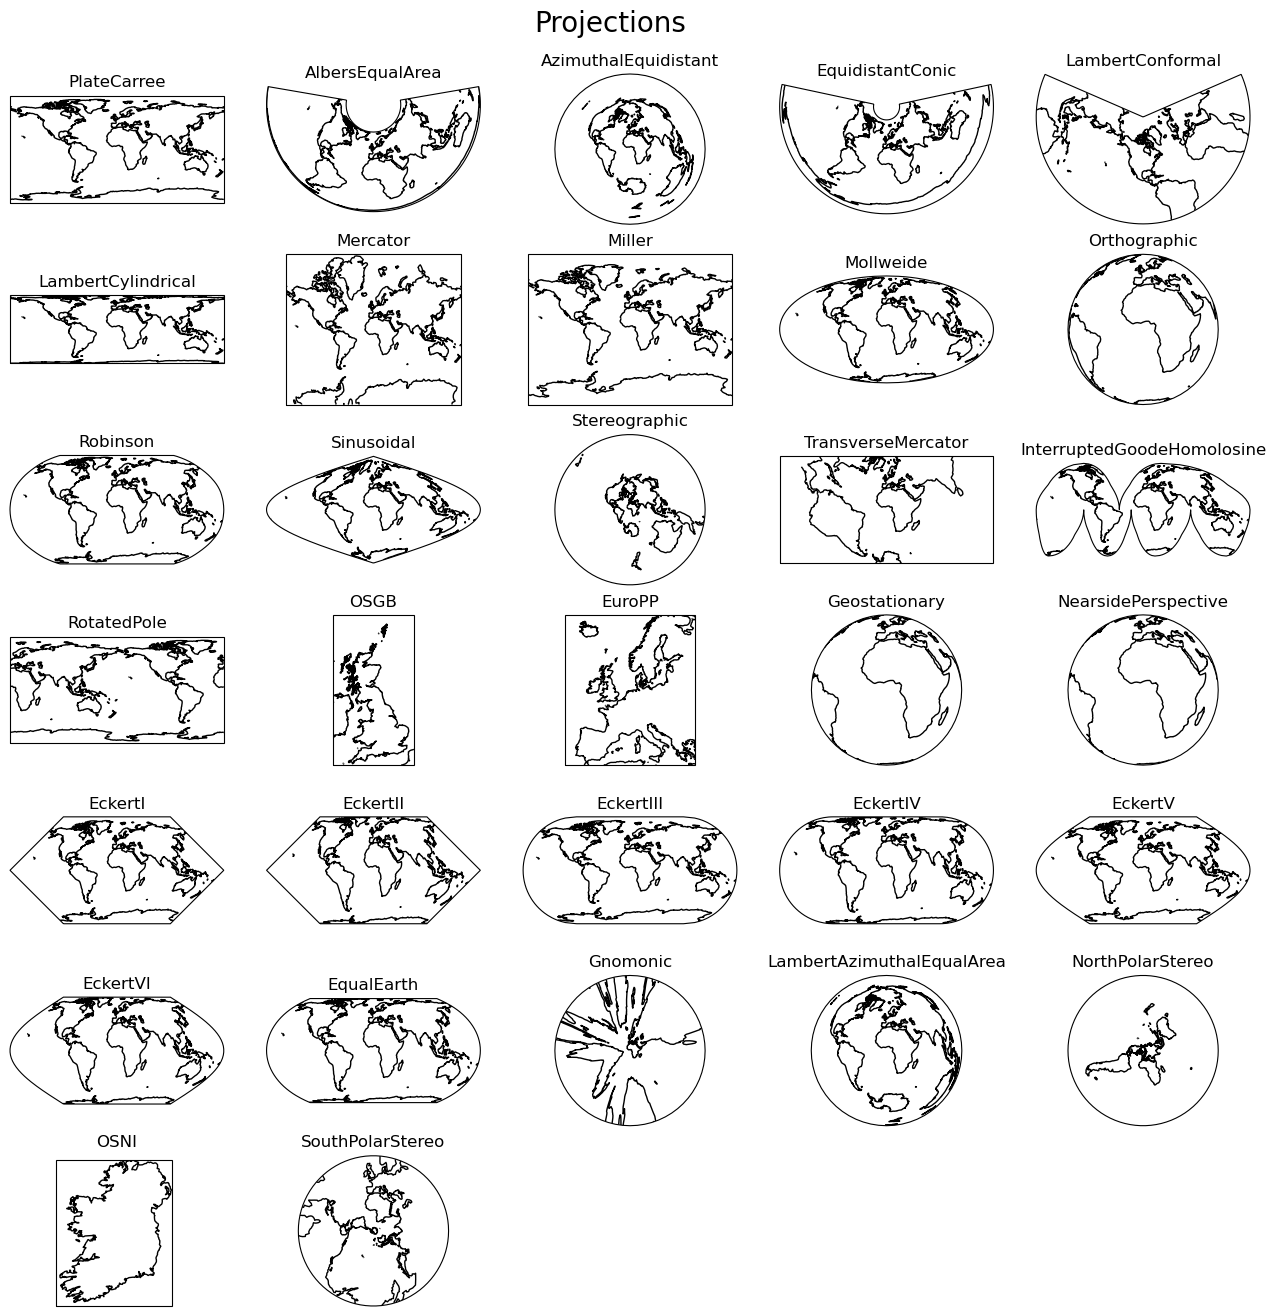

In [25]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__

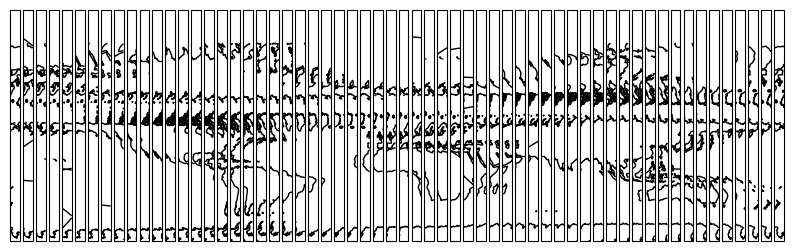

In [29]:
# UTM Projection
nplots = 60
fig = plt.figure(figsize=(10, 3))
for i in range(0, nplots):
    ax = fig.add_subplot(1, nplots, i+1, projection=ccrs.UTM(zone=i+1))
    ax.coastlines()

# Add Latitude and Longitude Labels

C:\Users\apurv\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\apurv\anaconda3\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

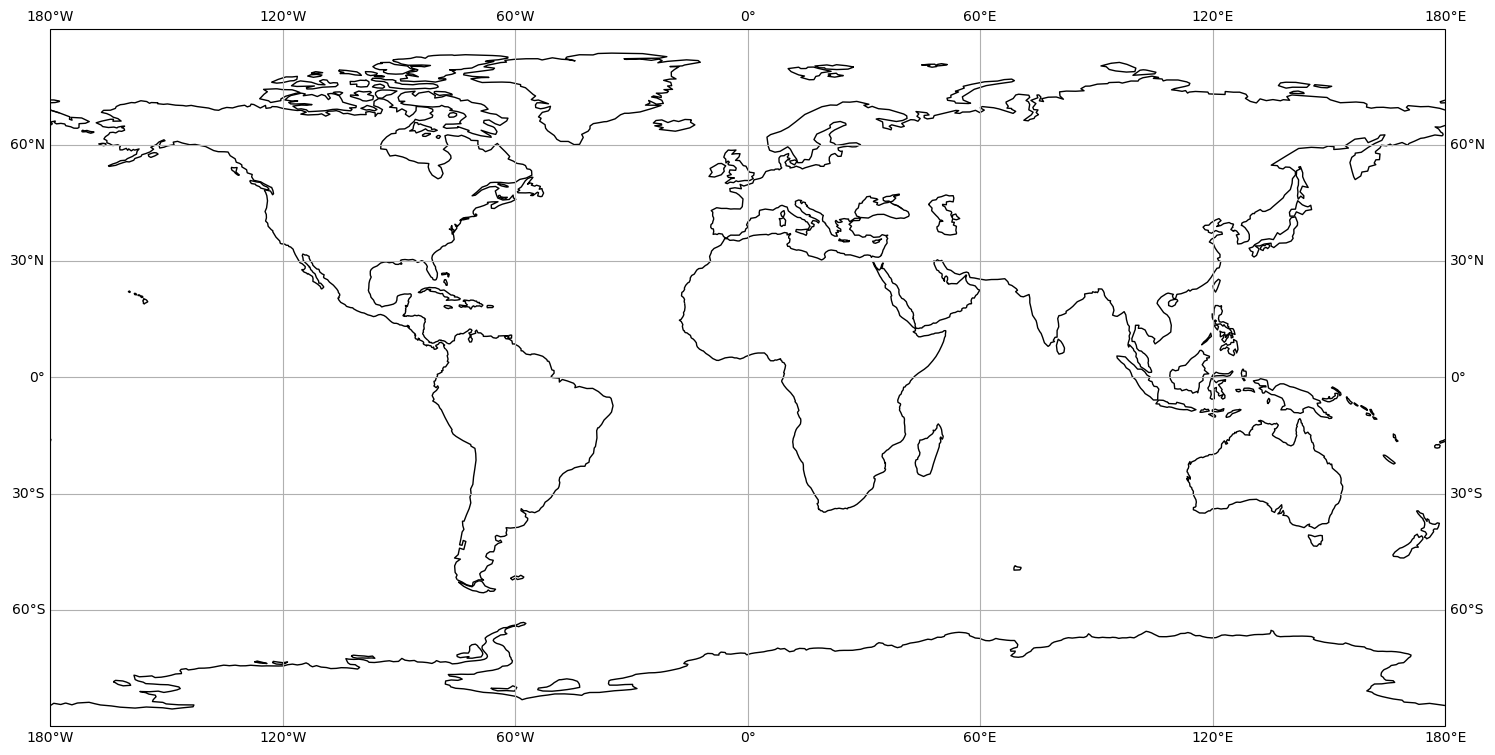

In [30]:
# latitude and longitude with east and west, etc.
plt.figure(figsize=(18, 12))
m8 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m8.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m8.coastlines()

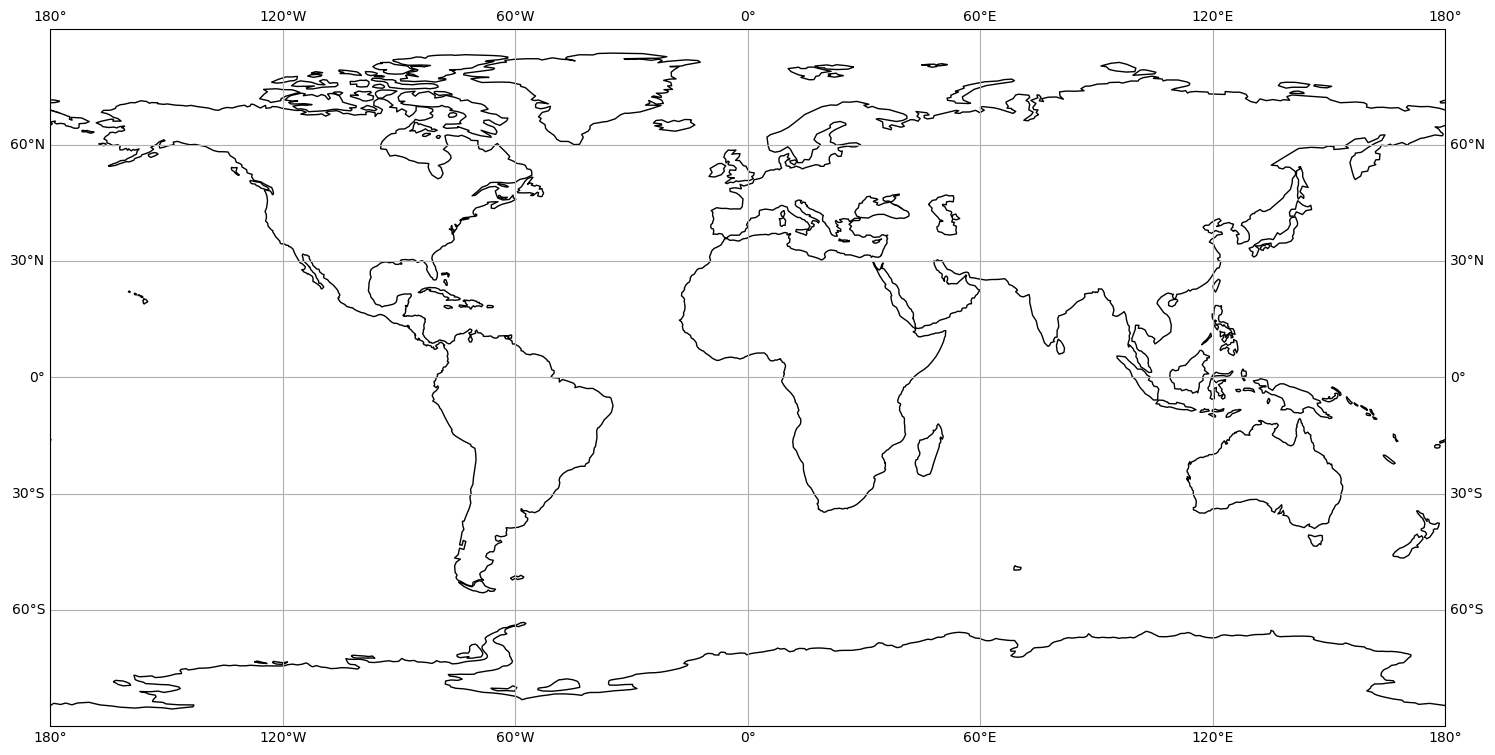

In [32]:
# latitude and longitude with positive and negative
plt.figure(figsize=(18, 12))
m9 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m9.gridlines(draw_labels=True)
m9.coastlines()

# Map Tiles

C:\Users\apurv\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\apurv\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


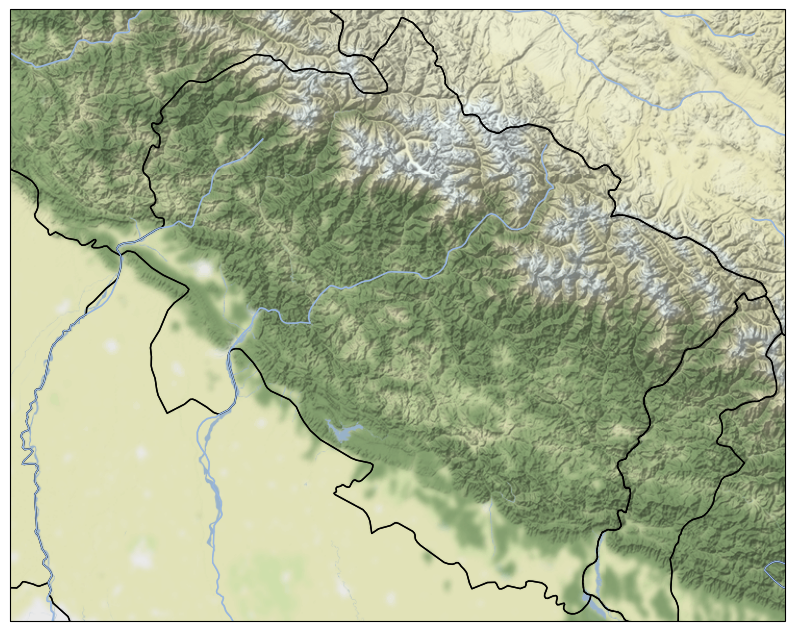

In [41]:
# run time can take several minutes
# import cartopy.io.img_tiles as cimgt
plt.figure(figsize=(10,10))
stamen_terrain = cimgt.Stamen('terrain-background')
m10 = plt.axes(projection=stamen_terrain.crs)
# (x0, x1, y0, y1)
m10.set_extent([77, 81.1, 28.7, 31.5])
m10.add_feature(cfeature.STATES)
m10.add_feature(cfeature.BORDERS, linestyle=':')
m10.add_feature(cfeature.LAKES, alpha=0.5)
m10.add_feature(cfeature.RIVERS)

# add map, zoom level
m10.add_image(stamen_terrain, 8)

# Natural Earth Data

scale options include: 10m, 50m, 110m (not all maps have all options)

some data options may not work

In [42]:
# shpreader.natural_earth?

In [43]:
# cfeature.NaturalEarthFeature?

In [44]:
from IPython.display import IFrame
ne = IFrame(src='https://www.naturalearthdata.com', width=1000, height=500)
display(ne)

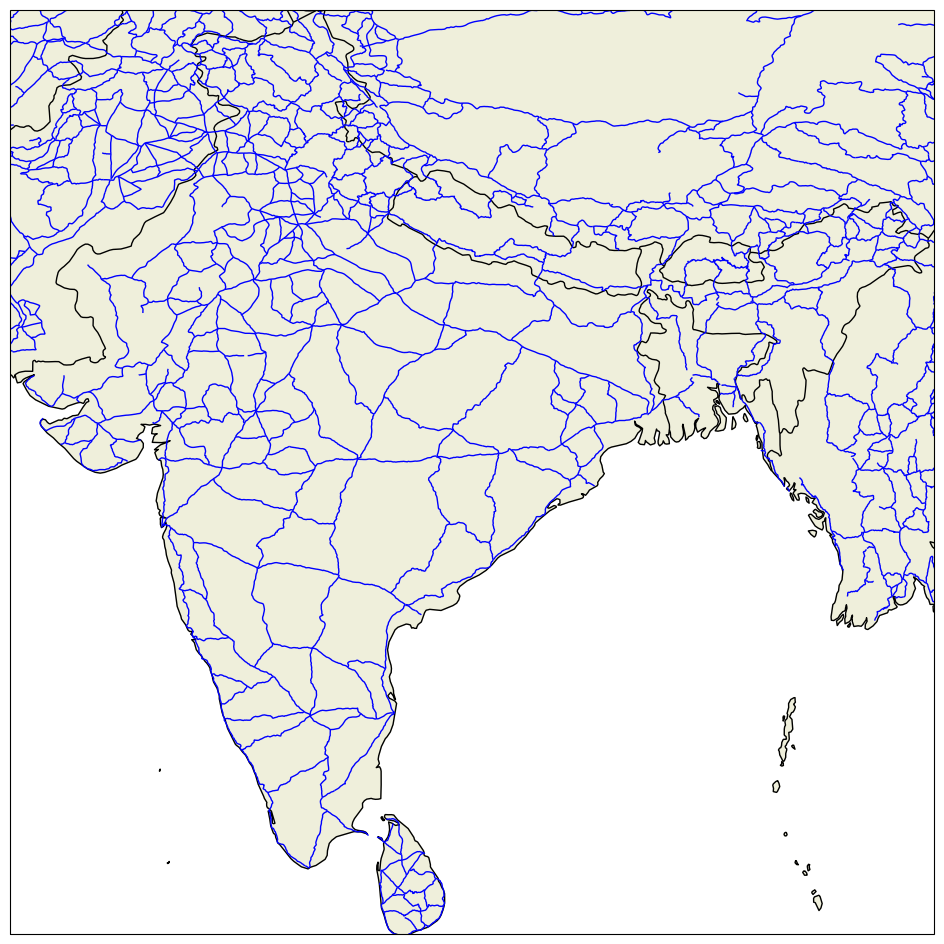

In [51]:
# roads
# import cartopy.feature as cfeature
plt.figure(figsize=(12,12))
m11 = plt.axes(projection=ccrs.PlateCarree())

# natural earth
# remove ne 10m from ne_10m_roads downlaod file name argument assignment
roads = cfeature.NaturalEarthFeature(category= 'cultural',
                                    name='roads',
                                    scale= '10m',
                                    facecolor='none')

# (x0, x1, y0, y1)
m11.set_extent([68, 97.5, 6, 35.5], ccrs.PlateCarree())
m11.add_feature(cfeature.LAND)
#m11.add_feature(cfeature.STATES)
m11.add_feature(cfeature.BORDERS)
m11.add_feature(cfeature.COASTLINE)
m11.add_feature(roads, edgecolor='blue')

C:\Users\apurv\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


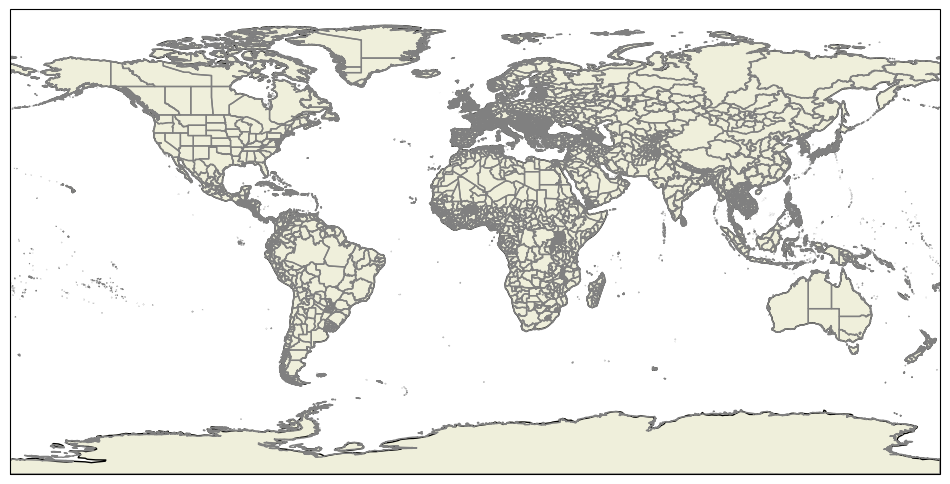

In [52]:
# states and provinces
# import cartopy.feature as cfeature
plt.figure(figsize=(12, 12))
m12 = plt.axes(projection=ccrs.PlateCarree())

# natural earth
# remove ne_10m_ from ne_10m_admin_1_states_provinces downloaded file name for name argument assignment
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces',
                                                scale='10m',
                                                facecolor='none')

m12.add_feature(cfeature.LAND)
m12.add_feature(cfeature.COASTLINE)
m12.add_feature(states_provinces, edgecolor='gray')

# Shape File Layers

In [53]:
# US Census Bureau - https://www.census.gov/cgi-bin/geo/shapefiles/index.php (counties data)
# import cartopy.io.shapereader as shpreader
# import cartopy.feature as cfeature
# run time can take several minutes

reader = shpreader.Reader('path/file_name.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

plt.figure(figsize=(10, 6))
m13 = plt.axes(projection=ccrs.PlateCarree())
m13.set_extent([-135, -60, 20, 60])
m13.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
# ax.coastlines()

ShapefileException: Unable to open path/file_name.dbf or path/file_name.shp.

# Chart with map inset

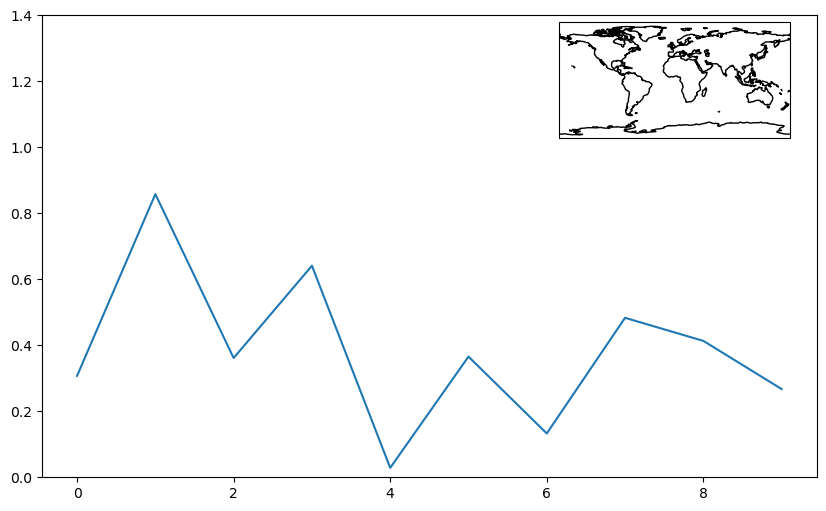

In [54]:
# import cartopy.mpl.geoaxes
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10,6))
m14 = fig.add_subplot()
m14.plot(np.random.rand(10))
m14.set_ylim(0,1.4)

inset = inset_axes(m14, width='35%', height='25%', loc='upper right', 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=ccrs.PlateCarree()))

inset.coastlines()

# Maps with widgets (ipywidgets)

In [55]:
import ipywidgets
from ipywidgets import Layout

land = ipywidgets.Checkbox(description='land', style={'description_width': 'initial'})
ocean = ipywidgets.Checkbox(description='ocean', style={'description_width': 'initial'})
coastline = ipywidgets.Checkbox(description='coastline', style={'description_width': 'initial'})
borders = ipywidgets.Checkbox(description='borders', style={'description_width': 'initial'})
lakes = ipywidgets.Checkbox(description='lakes', style={'description_width': 'initial'})
rivers = ipywidgets.Checkbox(description='rivers', style={'description_width': 'initial'})
plot_locations = ipywidgets.Checkbox(description='plot_locations', style={'description_width': 'initial'})

box_layout = ipywidgets.Layout(display='inline-flex',                               
                               flex_flow='row',
                               align_items='stretch',
                               border='solid',
                               width='100%')

ui = ipywidgets.HBox([land, ocean, coastline, borders, lakes, rivers, plot_locations], layout=box_layout)

def create_map(land,ocean,coastline,borders,lakes,rivers,plot_locations):
    data_crs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1, projection=data_crs)
    # make the map global rather than have it zoom in to the extents of any plotted data
    ax.set_global()
    if land == True: ax.add_feature(cfeature.LAND)
    if ocean == True: ax.add_feature(cfeature.OCEAN)
    if coastline == True: ax.add_feature(cfeature.COASTLINE)
    if borders == True: ax.add_feature(cfeature.BORDERS, linestyle=':')
    if lakes == True: ax.add_feature(cfeature.LAKES, alpha=0.5)
    if rivers == True: ax.add_feature(cfeature.RIVERS)
    if plot_locations == True:
        ny_lon, ny_lat = -75, 43
        delhi_lon, delhi_lat = 77.23, 28.61
        ax.plot(ny_lon, ny_lat, 'o', transform=data_crs)
        ax.plot(delhi_lon, delhi_lat, 'o', transform=data_crs)
        ax.text(ny_lon - 2, ny_lat - 4, 'New York', horizontalalignment='right', transform=data_crs)
        ax.text(delhi_lon + 1, delhi_lat - 6, 'Delhi', horizontalalignment='left', transform=data_crs)
        
out = ipywidgets.interactive_output(create_map, {'land': land,
                                                 'ocean': ocean,
                                                 'coastline': coastline,
                                                 'borders': borders,
                                                 'lakes': lakes,
                                                 'rivers': rivers,
                                                 'plot_locations': plot_locations})

display(ui, out)

Output()